I wanted to share something here, not because it’s never been done before, but because it shows the advantage of trying new approaches.

The birthday paradox is counter-intuitive and strange, and interesting – a great [walkthrough of the problem is here](https://betterexplained.com/articles/understanding-the-birthday-paradox/)

When I first went to write some code to simulate this, I went straight to what I was comfortable with – `pandas`. However, I was finding it was extremely slow for this particular problem – taking 5 minutes or more. I decided to try something I tend not to use directly instead – `numpy`.

The key was not overcomplicating it. Rather than creating some enormous dataframe with thousands of dates, dynamically creating a new small sample in numpy was much faster and efficient. See the improved code below that runs pretty fast. There is probably more optimisation possible but I was happy with this. You can also find the code, and my original pandas code [here at my github](https://github.com/ryanward-io/birthday_problem).

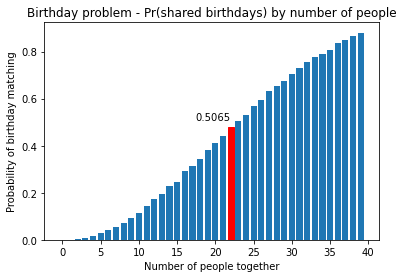

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import bisect

MAX_BIRTHDAY_TESTS = 40


def test_birthday_percentage(number, samples):
    counter = 0
    for i in range(samples):
        bdays = np.random.randint(1, 365, number)
        if len(np.unique(bdays)) != len(bdays):
            counter += 1
    return counter / samples


def create_success_dict(tests, samples=10000):
    success_dict = {}
    for i in range(tests):
        pc = test_birthday_percentage(i, samples)
        success_dict[i] = pc
    return success_dict


def show_probability_chart(success_dict):
    half_pos = bisect.bisect_right(list(s.values()), 0.5)
    barlist = plt.bar(list(s.keys()), list(s.values()))
    barlist[half_pos - 1].set_color('r')
    plt.text(half_pos - 1, s[half_pos], s[half_pos], ha="right")
    plt.title("Birthday problem - Pr(shared birthdays) by number of people")
    plt.xlabel("Number of people together")
    plt.ylabel("Probability of birthday matching")
    plt.show()


s = create_success_dict(MAX_BIRTHDAY_TESTS)
show_probability_chart(s)